<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.2_descriptives/stats_descriptives_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Descriptive statistics
# Data from different distributions

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

[-4.    -3.992 -3.984 ...  3.984  3.992  4.   ]
124.99221530601626
0.008000000000000007
0.008000000000000007
Total probability: 0.999937722448131
Total probability2: 0.999937722448131


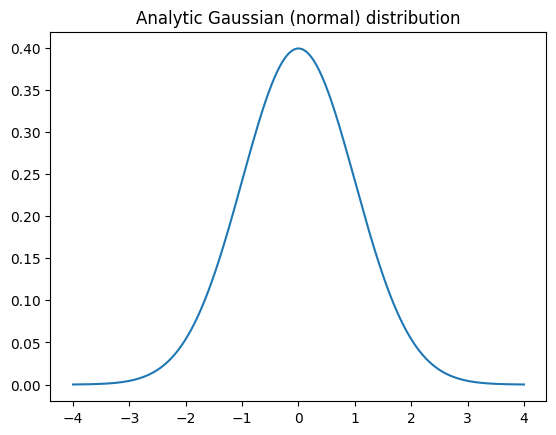

In [28]:
## Gaussian

# number of discretizations
N = 1001

x = np.linspace(-4,4,N)
print(x)
gausdist = stats.norm.pdf(x)

# is this a probability distribution?
print(sum(gausdist))
# try scaling by dx...

# dx is the step size between consecutive x-values
dx = x[1] - x[0]
diff = np.diff(x[:2])
print(dx)
print(diff[0])

# Sum of the pdf values scaled by dx
total_prob = sum(gausdist) * dx
total_prob2 = sum(gausdist) * diff

print("Total probability:", total_prob)
print("Total probability2:", total_prob2[0])

# plotting
plt.plot(x,gausdist)
# plt.plot(x,gausdist/sum(gausdist))
plt.title('Analytic Gaussian (normal) distribution')
plt.show()


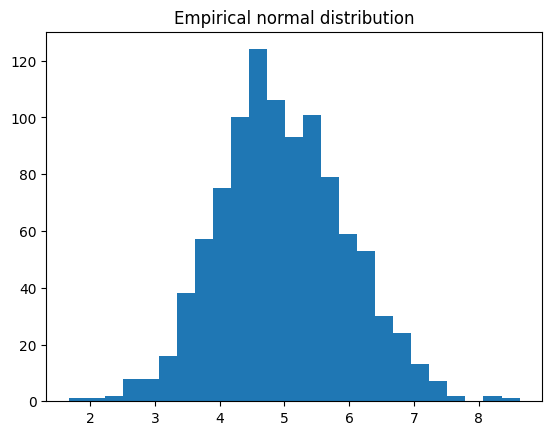

4.977122532554376


In [21]:
## Normally-distributed random numbers

# parameters
stretch = 1 # variance (square of standard deviation)
shift   = 5 # mean
n       = 1000

# create data
data = stretch*np.random.randn(n) + shift

# plot data
plt.hist(data,25)
plt.title('Empirical normal distribution')
plt.show()
print(np.mean(data))

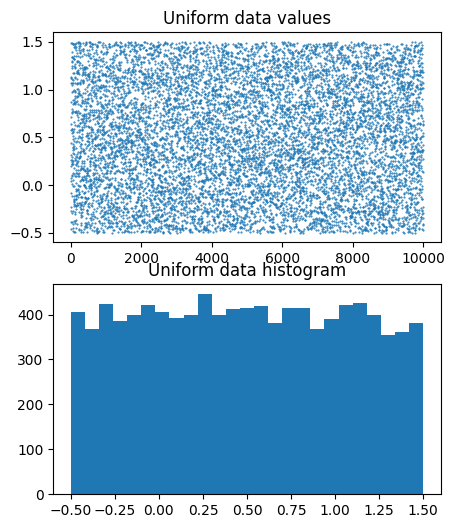

In [22]:
## Uniformly-distributed numbers

# parameters
stretch = 2 # not the variance
shift   = .5
n       = 10000

# create data
data = stretch*np.random.rand(n) + shift-stretch/2

# plot data
fig,ax = plt.subplots(2,1,figsize=(5,6))

ax[0].plot(data,'.',markersize=1)
ax[0].set_title('Uniform data values')

ax[1].hist(data,25)
ax[1].set_title('Uniform data histogram')

plt.show()

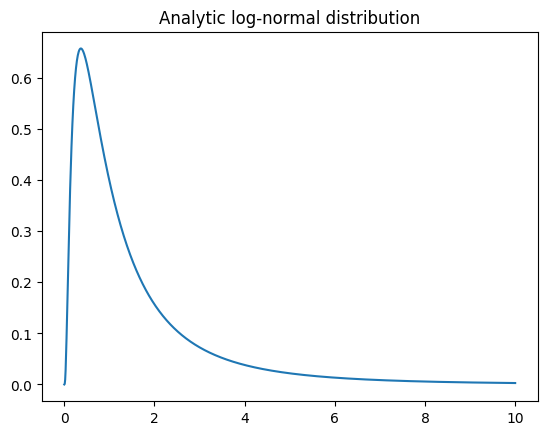

In [23]:
## log-normal distribution

N = 1001
x = np.linspace(0,10,N)
lognormdist = stats.lognorm.pdf(x,1)

plt.plot(x,lognormdist)
plt.title('Analytic log-normal distribution')
plt.show()

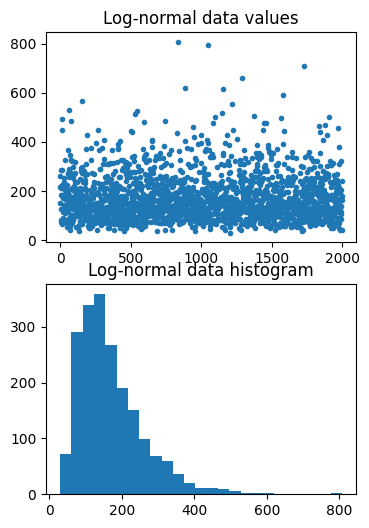

In [24]:
## empirical log-normal distribution

shift   = 5  # equal to the mean?
stretch = .5 # equal to standard deviation?
n = 2000     # number of data points

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.')
ax[0].set_title('Log-normal data values')

ax[1].hist(data,25)
ax[1].set_title('Log-normal data histogram')
plt.show()

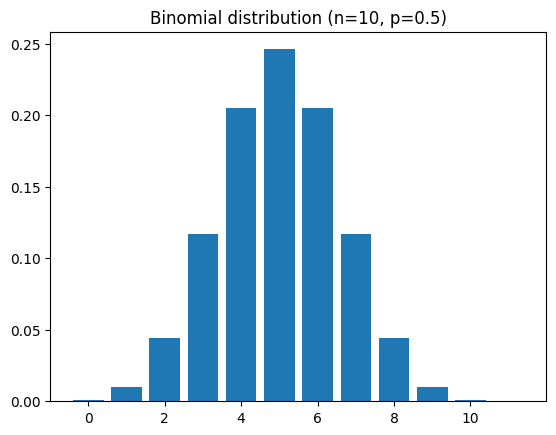

In [25]:
## binomial

# a binomial distribution is the probability of K heads in N coin tosses,
# given a probability of p heads (e.g., .5 is a fair coin).

n = 10 # number on coin tosses
p = .5 # probability of heads

x = range(n+2)
bindist = stats.binom.pmf(x,n,p)

plt.bar(x,bindist)
plt.title('Binomial distribution (n=%s, p=%g)'%(n,p))
plt.show()

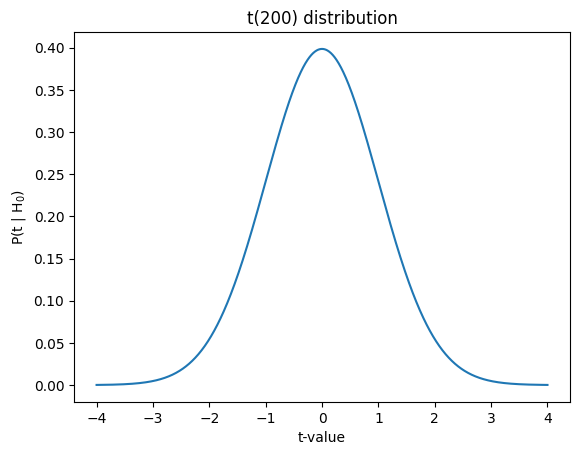

In [26]:
## t

x  = np.linspace(-4,4,1001)
df = 200
t  = stats.t.pdf(x,df)

plt.plot(x,t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$)')
plt.title('t(%g) distribution'%df)
plt.show()

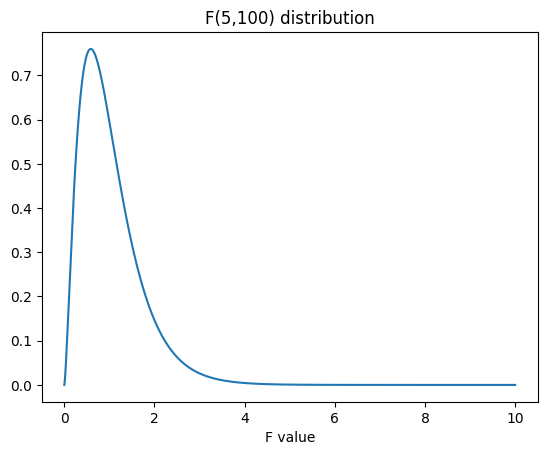

In [27]:
## F

# parameters
num_df = 5   # numerator degrees of freedom
den_df = 100 # denominator df

# values to evaluate
x = np.linspace(0,10,10001)

# the distribution
fdist = stats.f.pdf(x,num_df,den_df)

plt.plot(x,fdist)
plt.title(f'F({num_df},{den_df}) distribution')
plt.xlabel('F value')
plt.show()

---
# Code challenge: histograms of distributions
---

Sum of Gaussian PDF values before scaling: 99.99994414401642
Step size (dx): 0.009999999999999787
Total probability (scaled by dx): 0.999999441440143


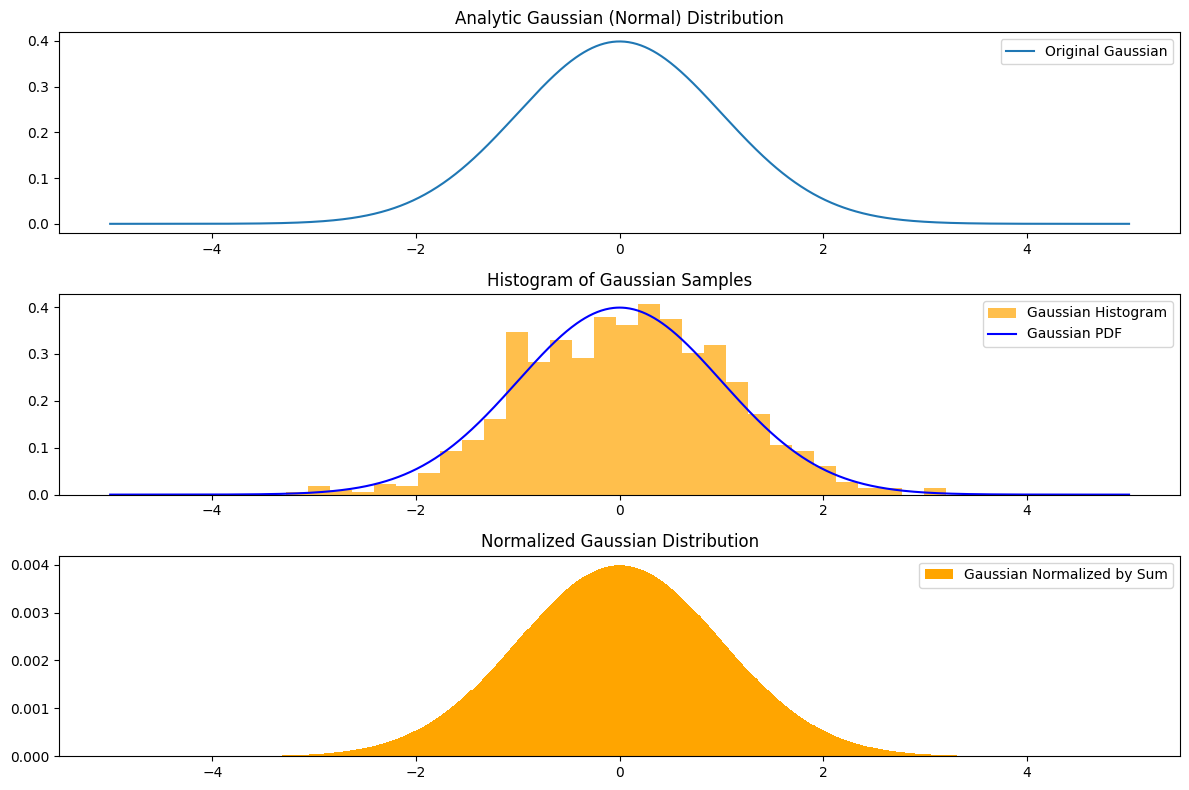

In [34]:

# Number of discretizations
N = 1001

# Generate x values and compute Gaussian distribution
x = np.linspace(-5, 5, N)
gausdist = stats.norm.pdf(x)

# Check if this is a probability distribution
print("Sum of Gaussian PDF values before scaling:", sum(gausdist))

# Calculate step size between consecutive x-values
dx = x[1] - x[0]
print("Step size (dx):", dx)

# Sum of the PDF values scaled by dx
total_prob = sum(gausdist) * dx
print("Total probability (scaled by dx):", total_prob)

# Generate random samples for histogram
n_samples = 1000
samples = np.random.normal(loc=0, scale=1, size=n_samples)

# Plotting
plt.figure(figsize=(12, 8))

# First plot: Original Gaussian distribution
plt.subplot(3, 1, 1)
plt.plot(x, gausdist, label='Original Gaussian')
plt.title('Analytic Gaussian (Normal) Distribution')
plt.legend()

# Second plot: Histogram of Gaussian samples normalized
plt.subplot(3, 1, 2)
plt.hist(samples, bins=30, density=True, color='orange', alpha=0.7, label='Gaussian Histogram')
plt.plot(x, gausdist, color='blue', label='Gaussian PDF')  # Overlay Gaussian PDF for comparison
plt.title('Histogram of Gaussian Samples')
plt.legend()

# Third plot: Gaussian distribution normalized by its sum as a bar plot
plt.subplot(3, 1, 3)
width = (x[1] - x[0])  # Width of each bar
plt.bar(x, gausdist/sum(gausdist), width=width, color='orange', label='Gaussian Normalized by Sum')
plt.title('Normalized Gaussian Distribution')
plt.legend()

# Show all plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


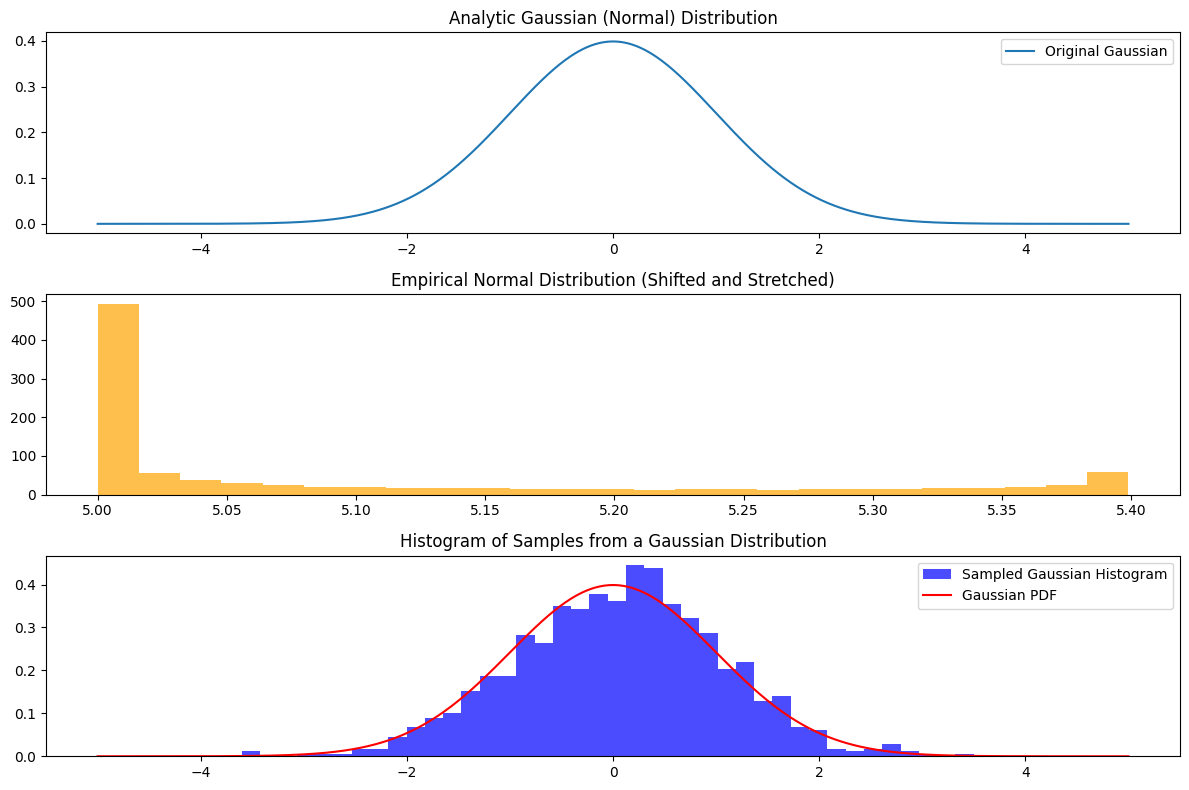

Mean of shifted data: 5.099899944201334


In [10]:
# Parameters
stretch = 1
shift   = 5
n       = 1000

# Create data
x = np.linspace(-5, 5, n)
gausdist = stats.norm.pdf(x)

# Data points (random samples from Gaussian distribution)
data = stretch * gausdist + shift

# Plot data
plt.figure(figsize=(12, 8))

# First plot: Original Gaussian distribution (analytic)
plt.subplot(3, 1, 1)
plt.plot(x, gausdist, label='Original Gaussian')
plt.title('Analytic Gaussian (Normal) Distribution')
plt.legend()

# Second plot: Histogram of the generated data (shifted and stretched)
plt.subplot(3, 1, 2)
plt.hist(data, bins=25, color='orange', alpha=0.7)
plt.title('Empirical Normal Distribution (Shifted and Stretched)')

# Third plot: Histogram of actual samples drawn from a Gaussian distribution
# Let's generate random samples directly from a Gaussian distribution
samples_from_gaussian = np.random.normal(loc=0, scale=1, size=n)

plt.subplot(3, 1, 3)
plt.hist(samples_from_gaussian, bins=40, density=True, color='blue', alpha=0.7, label='Sampled Gaussian Histogram')
plt.plot(x, gausdist, color='red', label='Gaussian PDF')
plt.title('Histogram of Samples from a Gaussian Distribution')
plt.legend()

# Show all plots
plt.tight_layout()  # Adjust layout so titles/labels don't overlap
plt.show()

# Print the mean of the shifted data
print("Mean of shifted data:", np.mean(data))